In [2]:
import pandas as pd
import importlib
import value_iteration
importlib.reload(value_iteration)
from value_iteration import run
from value_iteration import policy_run
import numpy as np

In [91]:
from itertools import product

is_slippery = [False, True]
n_iter = [150] # [40, 100, 1000]
env_sizes = [4, 8, 9, 10]
seed = [20] #20 works for 4 and 8, 16 and 32 are too big
discount_factor_gammas = [0.01, 0.5, 0.95, 0.99] #0.1, 0.5, 0.95 works
epsilon_decay_rates = [0.000001, 0.0001, 0.01]
render = [False]
hyperparameter_grid = list(product(render, is_slippery, n_iter, env_sizes, seed, discount_factor_gammas, epsilon_decay_rates))

999
0.01
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 3, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 5, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 4, 1, 1, 0, 3, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 3, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 

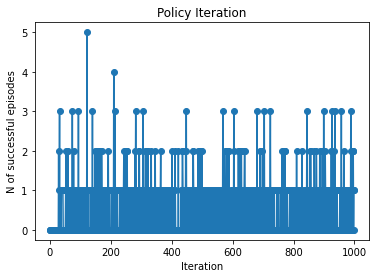

In [3]:
# Visualise policy over iterations
import matplotlib.pyplot as plt
import seaborn as sns
#V,pi, reward, rewards, rewards_per_episode, successful_episodes, steps = policy_run(render=False, is_slippery=True, n_iterations=100, env_size=4, seed=20, gamma=0.95, theta=0.0001)
#V, reward, rewards, steps = policy_run(render=False, is_slippery=True, n_iterations=100, env_size=4, seed=20, gamma=0.9, theta=0.001)
V, pi, reward, rewards, successful_episodes, steps = policy_run(render=False, is_slippery=True, n_iterations=1000, env_size=16, seed=20, gamma=0.95, theta=0.0001)

print(steps)
print(reward)
print(successful_episodes)
print(len(successful_episodes))

x = np.array(range(0, len(successful_episodes)))
#y = rewards
y = successful_episodes

print(y)
plt.plot(x, y, '-o')
plt.title('Policy Iteration')
plt.xlabel('Iteration')
plt.ylabel('N of successful episodes')
plt.show()




In [92]:
results = []
num_hyper = len(hyperparameter_grid)
print(f"Running {num_hyper} hyperparameter combinations")

for hyperparameters in hyperparameter_grid:
    render, is_slippery, n_iter, env_size, seed, discount_factor_gamma, epsilon_decay_rate = hyperparameters
    V, pi, reward, rewards, successful_episodes, steps = policy_run(render=render, env_size=env_size, is_slippery=is_slippery, n_iterations=n_iter, gamma=discount_factor_gamma, theta=epsilon_decay_rate, seed=seed,)
    results.append({"render": render, "is_slippery": is_slippery, "n_iterations": n_iter, "map_name": f'{env_size}x{env_size}', "seed": seed, "discount_factor_gamma": discount_factor_gamma, "epsilon_decay_rate": epsilon_decay_rate, "steps": steps, "sum_rewards": successful_episodes}) #, "successful_episodes": successful_episodes})
    print(f"{round(len(results)/num_hyper*100)}% done")
    
df = pd.DataFrame(results)

Running 96 hyperparameter combinations
1% done
2% done
3% done
4% done
5% done
6% done
7% done
8% done
9% done
10% done
11% done
12% done
14% done
15% done
16% done
17% done
18% done
19% done
20% done
21% done
22% done
23% done
24% done
25% done
26% done
27% done
28% done
29% done
30% done
31% done
32% done
33% done
34% done
35% done
36% done
38% done
39% done
40% done
41% done
42% done
43% done
44% done
45% done
46% done
47% done
48% done
49% done
50% done
51% done
52% done
53% done
54% done
55% done
56% done
57% done
58% done
59% done
60% done
61% done
62% done
64% done
65% done
66% done
67% done
68% done
69% done
70% done
71% done
72% done
73% done
74% done
75% done
76% done
77% done
78% done
79% done
80% done
81% done
82% done
83% done
84% done
85% done
86% done
88% done
89% done
90% done
91% done
92% done
93% done
94% done
95% done
96% done
97% done
98% done
99% done
100% done


In [ ]:
def calc_sum_rewards(rewards_per_episode):
    print(len(rewards_per_episode[0]))
    sum_rewards = np.zeros(rewards_per_episode.shape[0])
    for t in range(rewards_per_episode.shape[0]):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
        
    return sum_rewards

In [ ]:
df['sum_rewards'] = df['rewards_per_episode'].apply(calc_sum_rewards)


100


AttributeError: 'list' object has no attribute 'shape'

In [93]:
#save df to csv
import csv
print(df)
df.to_csv('./results/frozen_lake_results_value_iteration_150.csv', index=False, escapechar='\\', quoting=csv.QUOTE_NONE)
df.to_pickle('./results/frozen_lake_results_value_iteration_150.pkl')

    render  is_slippery  n_iterations map_name  seed  discount_factor_gamma  \
0    False        False           150      4x4    20                   0.01   
1    False        False           150      4x4    20                   0.01   
2    False        False           150      4x4    20                   0.01   
3    False        False           150      4x4    20                   0.50   
4    False        False           150      4x4    20                   0.50   
..     ...          ...           ...      ...   ...                    ...   
91   False         True           150    10x10    20                   0.95   
92   False         True           150    10x10    20                   0.95   
93   False         True           150    10x10    20                   0.99   
94   False         True           150    10x10    20                   0.99   
95   False         True           150    10x10    20                   0.99   

    epsilon_decay_rate  steps  \
0             0.00